<a href="https://colab.research.google.com/github/Mahsalo/BasicML/blob/main/FashionMNISTConv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)
## Loading the data
mnist = tf.keras.datasets.fashion_mnist
(tr_images,tr_labels),(ts_images,ts_labels) = mnist.load_data()

2.4.1


In [ ]:
## Normalization and re-sizing the data
## In order to be able to use Convolutional layers we need to reshape the input into a 4D array (#samples,dim1,dim2,1)
## It was wierd that if I change the order of normalization and reshaping the accuracy changes drastically :|
tr_images = tr_images.reshape(60000,28,28,1)
ts_images = ts_images.reshape(10000,28,28,1)

tr_images = tr_images/255.0
ts_images = ts_images/255.0

In [ ]:
## Defining the model with 2 Conv. layers and 2 Dense layers at the end (just like before :))

model = tf.keras.models.Sequential( [tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),
                                   tf.keras.layers.MaxPooling2D((2,2)),
                                   tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)),
                                   tf.keras.layers.MaxPooling2D((2,2)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(units = 128, activation = 'relu'),
                                   tf.keras.layers.Dense(units=10, activation = 'softmax')]
)


In [ ]:
## Compile it
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [ ]:
# Fit the model
model.fit(tr_images,tr_labels,epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.6416 - accuracy: 0.7656
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3238 - accuracy: 0.8810
Epoch 3/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2698 - accuracy: 0.9004
Epoch 4/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2361 - accuracy: 0.9130
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2133 - accuracy: 0.9210


In [ ]:
eval = model.evaluate(ts_images,ts_labels)
print(eval)

313/313 [==============================] - 3s 8ms/step - loss: 0.3678 - accuracy: 0.8668
[0.3678031861782074, 0.8668000102043152]


In [ ]:
print(ts_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


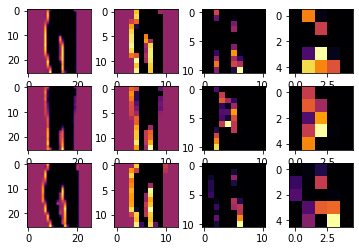

In [ ]:

### Examininig the output of the convolution layers to see the common features being detected each time
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=5
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(ts_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(ts_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(ts_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

- What changes do you see when you reduce th enumber of neaurons (filters) or increase them? The accuracy dropped when I decreased it

- What will happen if we add more layers?


- Note: If the images are 28*28, since we can put the filter on the borders there will be a loss of 2 pixels in each direction (horizontal, vertical), so as we see in the summary the 28*28 will change into 26*26

- Note: If the filter size is 64, after the convolutional layer we would have 64 images (feature maps) instead of one.
